In [ ]:
# импорт библиотек
# Работа с массивами данных
import numpy as np 

# Работа с таблицами
import pandas as pd

# Отрисовка графиков
import matplotlib.pyplot as plt

# Функции-утилиты для работы с категориальными данными
from tensorflow.keras import utils

# Класс для конструирования последовательной модели нейронной сети
from tensorflow.keras.models import Sequential

# Основные слои
from tensorflow.keras.layers import Dense, Dropout, Conv1D, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation,MaxPooling1D

# Матрица ошибок классификатора
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

from tensorflow.keras.layers import LSTM, Bidirectional

import logging
from typing import Tuple
import tensorflow as tf

from IPython.display import clear_output

# Кодирование тестовых меток
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 

# Разбиение на тренировочную и тестовую выборки
from sklearn.model_selection import train_test_split

from tensorflow.keras.optimizers import Adam

# Загрузка датасетов из облака google
import gdown

# Отрисовка графиков
import matplotlib.pyplot as plt

%matplotlib inline

# Для отрисовки графиков
import seaborn as sns
import warnings

In [ ]:
# загрузка тренировочного датасета
gdown.download('https://ai-data.obs.ru-moscow-1.hc.sbercloud.ru/%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D0%B5_%D1%81%D0%BF%D1%80%D0%BE%D1%81%D0%B0.zip', None, quiet=True)
!unzip -q "%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D0%B5_%D1%81%D0%BF%D1%80%D0%BE%D1%81%D0%B0" -d /content/ # подгрузим базу в ноутбук в директорию 'content/'

In [ ]:
df = pd.read_csv("train.csv", delimiter=';')


In [ ]:
dft = pd.read_csv("test.csv", delimiter=';')


In [ ]:
# удаление дубликатов строк и замена отсутствующих значений на -1
dfn = df.drop_duplicates().fillna(-1)


In [ ]:
# удаление дубликатов строк и замена отсутствующих значений на -1
dftn = dft.drop_duplicates().fillna(-1)


In [ ]:
# удаление не числовых полей
dfn=dfn.drop(['period', 'subject_type', 'subject_name','city_name','hex','hex_lat','hex_lon'], axis=1)
dfn


,label,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30
0,1,0.00101,0.00103,0.00195,0.0,0.0,0.41452,-1.0,0.00000,0.00000,...,0.13027,0.00000,0.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,0.01737,0.0
1,1,0.00000,0.00027,0.00053,0.0,0.0,0.41452,-1.0,0.00007,0.00007,...,0.08756,0.00000,0.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,0.01152,0.0
2,1,0.00339,0.00313,0.00439,0.0,0.0,0.41452,0.0,0.00000,0.00000,...,0.09243,0.00000,0.00000,0.11053,0.57895,0.00526,0.02105,0.00000,0.01540,0.0
3,1,0.00048,0.00054,0.00055,0.0,0.0,0.41452,-1.0,0.00000,0.00000,...,0.10192,0.00000,0.00049,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,0.01495,0.0
4,1,0.00164,0.00179,0.00219,0.0,0.0,0.41452,0.0,0.00000,0.00000,...,0.09620,0.00000,0.00000,0.14444,0.64444,0.01111,0.04444,0.01111,0.01266,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294253,0,0.00111,0.00100,0.00110,0.0,0.0,0.15391,0.0,0.00000,0.00000,...,0.41667,0.26667,0.00000,0.33929,0.78571,0.00000,0.01786,0.03571,0.01667,0.0
294254,0,0.00075,0.00065,0.00076,0.0,0.0,0.00643,0.0,0.00000,0.00000,...,0.42424,0.08333,0.00000,0.09449,0.80315,0.00787,0.00000,0.05512,0.02273,0.0
294255,0,0.00018,0.00014,0.00016,0.0,0.0,0.00140,0.0,0.00000,0.00000,...,0.20000,0.08333,0.00000,0.07547,0.81132,0.00000,0.00000,0.01887,0.00000,0.0
294256,0,0.00075,0.00138,0.00119,0.0,0.0,0.08380,-1.0,0.00000,0.00000,...,0.31990,0.08768,0.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,0.06398,0.0


In [ ]:
dftn=dftn.drop(['period', 'subject_type', 'subject_name','city_name','hex','hex_lat','hex_lon'], axis=1)
dftn

,label,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30
0,1,0.00292,0.00211,0.00265,0.00000,0.0000,0.41867,-1.0,0.00000,0.00000,...,0.13385,0.00000,0.00055,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,0.00498,0.00000
1,1,0.00265,0.00355,0.00351,0.00000,0.0000,0.01098,-1.0,0.00000,0.00000,...,0.14833,0.00000,0.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,0.00333,0.00000
2,1,0.00046,0.00059,0.00078,0.00000,0.0000,0.01727,-1.0,0.00000,0.00000,...,0.13562,0.00000,0.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,0.00904,0.00000
3,1,0.00304,0.00243,0.00275,0.00000,0.0000,0.02330,0.0,0.00000,0.00000,...,0.15629,0.00000,0.00122,0.09272,0.62252,0.00331,0.00993,0.00000,0.00977,0.00122
4,1,0.00183,0.00163,0.00233,0.00000,0.0000,0.01028,-1.0,0.00000,0.00000,...,0.13333,0.00000,0.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,0.00617,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152761,0,0.00164,0.00287,0.00355,0.00000,0.0000,0.01454,-1.0,0.00000,0.00000,...,0.31338,0.12514,0.00000,0.27071,0.67308,0.00296,0.00296,0.05769,0.05550,0.00218
152762,0,0.00053,0.00063,0.00088,0.00000,0.0000,0.01910,0.0,0.00000,0.00000,...,0.29167,0.10354,0.00000,0.17527,0.72826,0.00136,0.00272,0.08832,0.08333,0.00252
152763,0,-1.00000,-1.00000,-1.00000,0.00575,0.0087,-1.00000,0.0,0.00066,0.00066,...,-1.00000,-1.00000,-1.00000,0.17391,0.75362,0.00000,0.01449,0.02899,-1.00000,-1.00000
152764,0,0.00058,0.00068,0.00094,0.00000,0.0000,0.01249,-1.0,0.00000,0.00000,...,0.31250,0.27885,0.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,0.06130,0.00060


In [ ]:
X = dfn.values[:, :-1]
Y = np.array(dfn.label)

In [ ]:
X = X.reshape(X.shape[0], X.shape[1], 1)
Y = Y.reshape(-1, 1)

In [ ]:
ohe = OneHotEncoder(sparse=False)
Y = ohe.fit_transform(Y)

In [ ]:
print(X.shape)
print(Y.shape)

(293953, 30, 1)
(293953, 2)


In [ ]:
# разделение тренировочного датасета на тренировочный и валидационный
x_train, x_test, y_train, y_test = train_test_split(X, # набор параметров
                                                    Y, # набор меток классов
                                                    test_size=0.3, # процент в тестовую
                                                    shuffle=True, #  перемешивание
                                                    random_state=3) # воспроизводимость

# Выведем размерность полученных выборок

print('Обучающая выборка параметров', x_train.shape)
print('Обучающая выборка меток классов', y_train.shape)
print()
print('Тестовая выборка параметров', x_test.shape)
print('Тестовая выборка меток классов', y_test.shape)


Обучающая выборка параметров (205767, 30, 1)
Обучающая выборка меток классов (205767, 2)

Тестовая выборка параметров (88186, 30, 1)
Тестовая выборка меток классов (88186, 2)


In [ ]:
# функция модели
from tensorflow.keras.layers import LSTM, Bidirectional

def LSTMModel(seq_length=30, depth=1, n_class=2):
    
    model = tf.keras.Sequential()
    model.add(Bidirectional(LSTM(32, input_shape=(seq_length, depth))))
    #model.add(Dense(512))
    model.add(Dropout(rate=0.25))
    model.add(Dense(n_class, activation="softmax"))
    
    return model


In [ ]:
#классы для процесса обучения
# tf warning suppression
tf.autograph.set_verbosity(0)
logging.getLogger("tensorflow").setLevel(logging.ERROR)

class TrackMetrics(tf.keras.callbacks.Callback):
    """
      Callback to plot the learning curves of model during the training.
    """
    def on_train_begin(self, logs={}):
        self.metrics = {}
        for metric in logs:
            self.metrics[metric] = []
            

    def on_epoch_end(self, epoch, logs={}):
        # Storing metrics
        for metric in logs:
            if metric in self.metrics:
                self.metrics[metric].append(logs.get(metric))
            else:
                self.metrics[metric] = [logs.get(metric)]
        
        # Plotting
        metrics = [x for x in logs if 'val' not in x]
   
        f, axs = plt.subplots(1, len(metrics), figsize=(12,4))
        clear_output(wait=True)
        
        for i, metric in enumerate(metrics):
            axs[i].plot(range(1, epoch + 2), 
                        self.metrics[metric], 
                        label=metric)
            if metric != "lr":       
                if logs['val_' + metric]:
                    axs[i].plot(range(1, epoch + 2), 
                                self.metrics['val_' + metric], 
                                label='val_' + metric)
            
            axs[i].set_xlabel("Epoch")
            axs[i].legend()
            axs[i].grid()

        plt.tight_layout()
        plt.show()
        
        
        
class Trainer:
    '''Custom Trainer class'''
    
    def __init__(self, model, optimizer="adam", learning_rate=0.001, callbacks=None):
        self.model = model
        if optimizer == "adam":
            self.optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-7)
        self.model.compile(optimizer=self.optimizer, loss="categorical_crossentropy", metrics=["accuracy"])
        
        if not callbacks:
            self.callbacks = [tf.keras.callbacks.ModelCheckpoint("best_model.h5", save_best_only=True, monitor="val_loss"),
                              tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.25, patience=5, min_lr=0.0001),
                              tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, verbose=1),
                              TrackMetrics()]
        else:
            self.callbacks = callbacks
            
    def run(self, X, y, epochs=5, batch_size=256, validation_data: Tuple=None):
        
        if not validation_data:  
            split_ratio = 0.2     
        else:
            split_ratio = 0.0
        
        self.model.fit(X, y, 
                       epochs=epochs,
                       batch_size=batch_size,
                       verbose=1,
                       validation_split=split_ratio, 
                       validation_data=validation_data,
                       callbacks=self.callbacks
                      )
        return self.model        

In [ ]:
X_tr, X_val, y_tr, y_val = train_test_split(x_train, y_train, test_size=0.5, random_state=22, shuffle=False)

In [ ]:
#создание модели вызов функции модели
model = LSTMModel(seq_length=30, depth=1, n_class=2)


In [ ]:
trainer = Trainer(model)

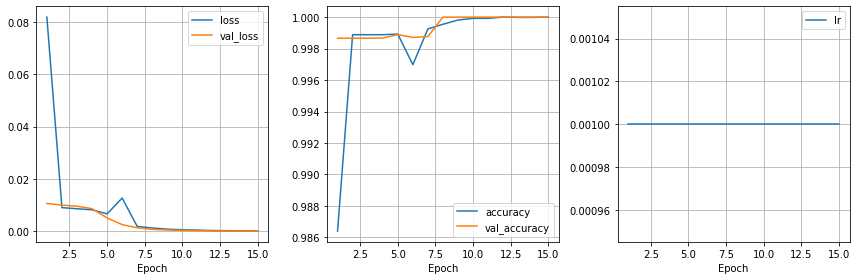

402/402 [==============================] - 4s 11ms/step - loss: 1.2452e-04 - accuracy: 1.0000 - val_loss: 4.0112e-05 - val_accuracy: 1.0000 - lr: 0.0010


In [ ]:
# процесс обучения
model = trainer.run(X_tr, y_tr, epochs=15, validation_data=(X_val, y_val))

In [ ]:
# наша модель
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_4 (Bidirectio  (None, 64)               8704      
 nal)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 2)                 130       
                                                                 
Total params: 8,834
Trainable params: 8,834
Non-trainable params: 0
_________________________________________________________________


In [ ]:
 # предсказание результата по нашей обученной модели 
y_pred = model.predict(x_test, batch_size=512)
y_pred.shape

(88186, 2)

In [ ]:
# метрики результата предсказания
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     86005
           1       1.00      1.00      1.00      2181

    accuracy                           1.00     88186
   macro avg       1.00      1.00      1.00     88186
weighted avg       1.00      1.00      1.00     88186



In [ ]:
# подготовка тестового датасета

df_test = pd.read_csv("test.csv", delimiter=';')
# удаление дубликатов строк и замена отсутствующих значений на -1
df_test = df_test.drop_duplicates().fillna(-1)
df_test.label =-1
df_test

,label,period,subject_type,subject_name,city_name,hex,hex_lat,hex_lon,f1,f2,...,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30
0,-1,2020-11-01,Город,Москва,Москва,8611aa6b7ffffff,55.656639,37.774902,0.00292,0.00211,...,0.13385,0.00000,0.00055,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,0.00498,0.00000
1,-1,2020-11-01,Город,Москва,Москва,8611aa70fffffff,55.879910,37.583383,0.00265,0.00355,...,0.14833,0.00000,0.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,0.00333,0.00000
2,-1,2020-11-01,Город,Москва,Москва,8611aa627ffffff,55.855726,37.669858,0.00046,0.00059,...,0.13562,0.00000,0.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,0.00904,0.00000
3,-1,2020-11-01,Город,Москва,Москва,861181b2fffffff,55.496542,37.542584,0.00304,0.00243,...,0.15629,0.00000,0.00122,0.09272,0.62252,0.00331,0.00993,0.00000,0.00977,0.00122
4,-1,2020-11-01,Город,Москва,Москва,8611aa4cfffffff,55.613025,37.529612,0.00183,0.00163,...,0.13333,0.00000,0.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,0.00617,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152761,-1,2021-06-01,Область,Магаданская,Магадан,861710967ffffff,59.544997,150.861279,0.00164,0.00287,...,0.31338,0.12514,0.00000,0.27071,0.67308,0.00296,0.00296,0.05769,0.05550,0.00218
152762,-1,2021-06-01,Край,Камчатский,Петропавловск-Камчатский,8616163afffffff,53.090818,158.588644,0.00053,0.00063,...,0.29167,0.10354,0.00000,0.17527,0.72826,0.00136,0.00272,0.08832,0.08333,0.00252
152763,-1,2021-06-01,Край,Приморский,Покровка,863161b07ffffff,43.941627,131.648920,-1.00000,-1.00000,...,-1.00000,-1.00000,-1.00000,0.17391,0.75362,0.00000,0.01449,0.02899,-1.00000,-1.00000
152764,-1,2021-06-01,Республика,Саха /Якутия/,Якутск,86155d14fffffff,62.007715,129.645173,0.00058,0.00068,...,0.31250,0.27885,0.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,0.06130,0.00060


In [ ]:
df_test.label.value_counts()

-1    152689
Name: label, dtype: int64

In [ ]:
 #предскзание результата
predict = []
for i in range(88186):
  pred = np.argmax(y_pred[i])
  predict.append(pred)
print(predict[:100])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
# формирование датасета 
dframe_pred = pd.DataFrame(predict) 
dframe_pred

,0
0,0
1,0
2,0
3,0
4,0
...,...
88181,0
88182,0
88183,0
88184,0


In [ ]:
# результат предсказания по классам
dframe_pred.value_counts()

0    86005
1     2181
dtype: int64

In [ ]:
test = pd.concat([df_test, dframe_pred], axis=1)   
test

,label,period,subject_type,subject_name,city_name,hex,hex_lat,hex_lon,f1,f2,...,f22,f23,f24,f25,f26,f27,f28,f29,f30,0
0,1.0,2020-11-01,Город,Москва,Москва,8611aa6b7ffffff,55.656639,37.774902,0.00292,0.00211,...,0.00000,0.00055,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,0.00498,0.00000,0.0
1,1.0,2020-11-01,Город,Москва,Москва,8611aa70fffffff,55.879910,37.583383,0.00265,0.00355,...,0.00000,0.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,0.00333,0.00000,0.0
2,1.0,2020-11-01,Город,Москва,Москва,8611aa627ffffff,55.855726,37.669858,0.00046,0.00059,...,0.00000,0.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,0.00904,0.00000,0.0
3,1.0,2020-11-01,Город,Москва,Москва,861181b2fffffff,55.496542,37.542584,0.00304,0.00243,...,0.00000,0.00122,0.09272,0.62252,0.00331,0.00993,0.00000,0.00977,0.00122,0.0
4,1.0,2020-11-01,Город,Москва,Москва,8611aa4cfffffff,55.613025,37.529612,0.00183,0.00163,...,0.00000,0.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,0.00617,0.00000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152761,0.0,2021-06-01,Область,Магаданская,Магадан,861710967ffffff,59.544997,150.861279,0.00164,0.00287,...,0.12514,0.00000,0.27071,0.67308,0.00296,0.00296,0.05769,0.05550,0.00218,NaN
152762,0.0,2021-06-01,Край,Камчатский,Петропавловск-Камчатский,8616163afffffff,53.090818,158.588644,0.00053,0.00063,...,0.10354,0.00000,0.17527,0.72826,0.00136,0.00272,0.08832,0.08333,0.00252,NaN
152763,0.0,2021-06-01,Край,Приморский,Покровка,863161b07ffffff,43.941627,131.648920,-1.00000,-1.00000,...,-1.00000,-1.00000,0.17391,0.75362,0.00000,0.01449,0.02899,-1.00000,-1.00000,NaN
152764,0.0,2021-06-01,Республика,Саха /Якутия/,Якутск,86155d14fffffff,62.007715,129.645173,0.00058,0.00068,...,0.27885,0.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,0.06130,0.00060,NaN


In [ ]:
# сохранение результата предсказания
test.to_csv('Leytenant Colombo.csv')

NameError: ignored

In [ ]:
# Функция вывода результатов оценки модели на заданных данных
def eval_model(model, x, y_true,
               class_labels,
               cm_round=3,
               title='',
               figsize=(10, 10)):
    # Вычисление предсказания сети
    y_pred = model.predict(x)
    # Построение матрицы ошибок
    cm = confusion_matrix(np.argmax(y_true, axis=1),
                          np.argmax(y_pred, axis=1),
                          normalize='true')
    # Округление значений матрицы ошибок
    cm = np.around(cm, cm_round)

    # Отрисовка матрицы ошибок
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_title(f'Нейросеть {title}: матрица ошибок нормализованная', fontsize=18)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(ax=ax)
    plt.gca().images[-1].colorbar.remove()  # Стирание ненужной цветовой шкалы
    plt.xlabel('Предсказанные классы', fontsize=16)
    plt.ylabel('Верные классы', fontsize=16)
    fig.autofmt_xdate(rotation=45)          # Наклон меток горизонтальной оси при необходимости
    plt.show()    

    print('-'*100)
    print(f'Нейросеть: {title}')

    # Для каждого класса:
    for cls in range(len(class_labels)):
        # Определяется индекс класса с максимальным значением предсказания (уверенности)
        cls_pred = np.argmax(cm[cls])
        # Формируется сообщение о верности или неверности предсказания
        msg = 'ВЕРНО :-)' if cls_pred == cls else 'НЕВЕРНО :-('
        # Выводится текстовая информация о предсказанном классе и значении уверенности
        print('Класс: {:<20} {:3.0f}% сеть отнесла к классу {:<20} - {}'.format(class_labels[cls],
                                                                               100. * cm[cls, cls_pred],
                                                                               class_labels[cls_pred],
                                                                               msg))

    # Средняя точность распознавания определяется как среднее диагональных элементов матрицы ошибок
    print('\nСредняя точность распознавания: {:3.0f}%'.format(100. * cm.diagonal().mean()))


TypeError: ignored

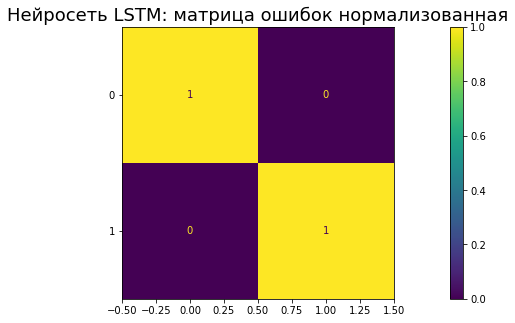

In [ ]:
    # Вывод результатов оценки работы модели на тестовых данных
    eval_model(model, x_test, y_test, 
               class_labels=2, 
               title='LSTM',
               figsize=(20,5))